In [1]:
import cfbd
import matplotlib.pyplot as plt
import pandas as pd
from config import api_key
import scipy.stats as st

configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = api_key
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))

In [2]:
season = [year for year in range(2004,2021)]
season_extended = [year for year in range(1970,2021)]

score_df = pd.DataFrame({"Season":season,
                         "Avg Points Scored Per Game": "",
                         "Avg Turnovers": "",
                         "Avg Total Yards": "",
                         "Avg Third Down Eff": "",
                         "Avg Margin of Victory": "",
                         "Avg Number of Punts": "",
                         "Number of Punts": "",
                         "Avg Loss of Yard Plays": "",
                         "Avg Standard Gain Plays": "",
                         "Avg Explosive Plays": "",
                         "Num Loss of Yard Plays": "",
                         "Num Standard Gain Plays": "",
                         "Num Explosive Plays": "",
                         "Number of Games": ""})

In [8]:
for year in season:

    total_points = []
    point_diff = []
    for game in games:
        try:
            total_points.append(int(game.home_points)+int(game.away_points))
            point_diff.append(abs(int(game.home_points)-int(game.away_points)))
        except:
            print("Skip Game")
    score_df.loc[score_df["Season"] == year, ["Avg Points Scored Per Game"]] = sum(total_points) / len(total_points)
    score_df.loc[score_df["Season"] == year, ["Avg Margin of Vitory"]] = sum(point_diff) / len(point_diff)

In [9]:
for year in season:
    turnovers = []
    total_yards = []
    third_attempts = []
    third_successes = []
    num_games = 0
    for week in range(1,17):
        try:
            game_teams = api_instance.get_team_game_stats(year=year, week=week)
            for game in game_teams:
                stats_list_1 = game.teams[0]["stats"]
                stats_list_2 = game.teams[1]["stats"]
                num_games += 1
                for result in stats_list_1:                 
                    if result["category"] == "turnovers":
                        turnover_1 = int(result["stat"])
                    elif result["category"] == "totalYards":
                        tot_yards_1 = int(result["stat"])  
                    elif result["category"] == "thirdDownEff":
                        third_eff_str_1 = result["stat"].split("-") #thirdDownEff
                for result in stats_list_2:                 
                    if result["category"] == "turnovers":
                        turnover_2 = int(result["stat"])
                    elif result["category"] == "totalYards":
                        tot_yards_2 = int(result["stat"])
                    elif result["category"] == "thirdDownEff":
                        third_eff_str_2 = result["stat"].split("-") #thirdDownEff
                
                turnovers.append(turnover_1 + turnover_2)
                total_yards.append(tot_yards_1 + tot_yards_2)
                third_attempts.append(int(third_eff_str_1[1])+int(third_eff_str_2[1]))
                third_successes.append(int(third_eff_str_1[0])+int(third_eff_str_2[0]))
        except Exception as e:
            print(f"No data for season {year} week {week}. Skipping {e}")
    score_df.loc[score_df["Season"] == year, ["Avg Turnovers"]] = sum(turnovers)/len(turnovers)
    score_df.loc[score_df["Season"] == year, ["Avg Total Yards"]] = sum(total_yards)/len(total_yards)
    score_df.loc[score_df["Season"] == year, ["Avg Third Down Eff"]] = (sum(third_successes)/len(third_successes)) / (sum(third_attempts)/len(third_attempts))
    score_df.loc[score_df["Season"] == year, ["Number of Games"]] = num_games

In [ ]:
api_instance = cfbd.DrivesApi(cfbd.ApiClient(configuration))

for year in season:
    games = api_instance.get_drives(year=year)
    drive_results = pd.DataFrame([game.to_dict() for game in games])
    drive_result_value_counts = drive_results["drive_result"].value_counts()
    score_df.loc[score_df["Season"] == year, ["Number of Punts"]] = drive_result_value_counts["PUNT"] + drive_result_value_counts["PUNT RETURN TD"]

In [ ]:
rush_types = [5, 68]
pass_types = [24, 67, 51, 4]
neg_play_types = [7, 20]

api_instance = cfbd.PlaysApi(cfbd.ApiClient(configuration))

for year in season:
    explosive_plays = 0
    standard_plays = 0
    loss_plays = 0
    for week in range(1,17):
        for rush_type in rush_types:
            plays = api_instance.get_plays(year=year,week=week,play_type=rush_type)
            for play in plays:
                if play.yards_gained >= 20:
                    explosive_plays += 1
                elif play.yards_gained >= 0:
                    standard_plays += 1
                else:
                    loss_plays += 1
        for pass_type in pass_types:
            plays = api_instance.get_plays(year=year,week=week,play_type=pass_type)
            for play in plays:
                if play.yards_gained >= 30:
                    explosive_plays += 1
                elif play.yards_gained >= 0:
                    standard_plays += 1
                else:
                    loss_plays += 1
        for neg_play in neg_play_types:
            plays = api_instance.get_plays(year=year,week=week,play_type=neg_play)
            for play in plays:
                loss_plays += 1
    score_df.loc[score_df["Season"] == year, ["Num Explosive Plays"]] = explosive_plays
    score_df.loc[score_df["Season"] == year, ["Num Standard Gain Plays"]] = standard_plays
    score_df.loc[score_df["Season"] == year, ["Num Loss of Yard Plays"]] = loss_plays

In [ ]:
score_df

In [ ]:
score_df

In [ ]:
score_df=score_df.astype(float)
score_df.dtypes

In [20]:
score_df["Avg Points Scored Per Game"] = score_df["Avg Points Scored Per Game"].astype(float)
score_df["Avg Turnovers"] = score_df["Avg Turnovers"].astype(float)
score_df["Avg Total Yards"] = score_df["Avg Total Yards"].astype(float)
score_df["Avg Third Down Eff"] = score_df["Avg Third Down Eff"].astype(float)
score_df["Avg Penalty Yards"] = score_df["Avg Penalty Yards"].astype(float)
score_df["Avg Margin of Victory"] = score_df["Avg Margin of Victory"].astype(float)
score_df["Avg Number of Punts"] = score_df["Avg Number of Punts"].astype(float)

<ipython-input-20-a9d16be81518>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_score_df["Avg Excitement Index"] = new_score_df["Avg Excitement Index"].astype(float)


In [6]:
def time_series_plot(y_axis, y_label, title, xpos, ypos):
    plt.plot(score_df["Season"], y_axis)
    plt.xlabel("Football Season")
    plt.ylabel(y_label)
    plt.title(title)
    
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(score_df["Season"],y_axis)
    regress_values = score_df["Season"] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(score_df["Season"], regress_values, "r-")
    plt.annotate(line_eq,(xpos,ypos),size=15, color="red")
    
    return print(f'R-value: {round(rvalue,2)}')

def linear_regression(y_axis):
    correlation, p = st.pearsonr(score_df["Season"],y_axis)
    return correlation

R-value: 0.77


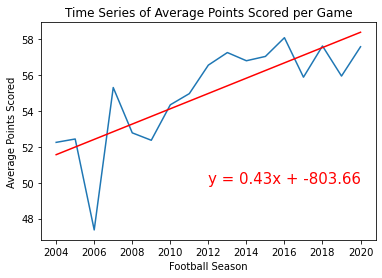

In [85]:
time_series_plot(score_df["Avg Points Scored Per Game"], "Average Points Scored", "Time Series of Average Points Scored per Game", 2012, 50)

R-value: -0.98


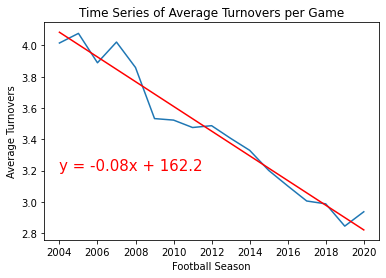

In [86]:
time_series_plot(score_df["Avg Turnovers"], "Average Turnovers", "Time Series of Average Turnovers per Game", 2004, 3.2)

R-value: 0.76


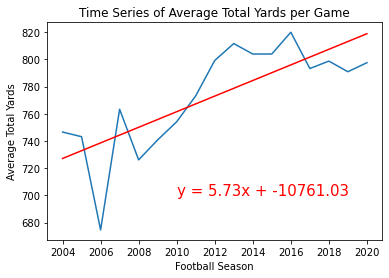

In [88]:
time_series_plot(score_df["Avg Total Yards"], "Average Total Yards", "Time Series of Average Total Yards per Game", 2010, 700)

R-value: 0.56


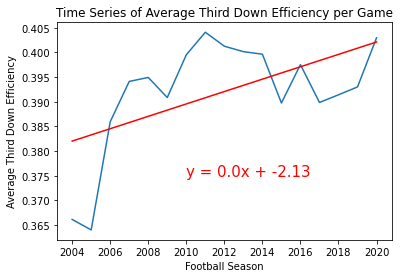

In [89]:
time_series_plot(score_df["Avg Third Down Eff"], "Average Third Down Efficiency", "Time Series of Average Third Down Efficiency per Game", 2010, .375)

In [ ]:
time_series_plot(score_df["Avg Margin of Victory"], "Average Margin of Victory", "Time Series of Average Margin of Victory per Game", 2010, 10)

In [ ]:
time_series_plot(score_df["Avg Number of Punts"], "Average Number of Punts", "Time Series of Average Number of Punts per Game", 2010, 7)

In [77]:
corr_matrix = score_df.corr()
corr_matrix

,Season,Avg Points Scored Per Game,Avg Turnovers,Avg Total Yards,Avg Third Down Eff,Avg Penalty Yards
Season,1.000000,0.772613,-0.979165,0.759663,0.556379,0.610487
Avg Points Scored Per Game,0.772613,1.000000,-0.707343,0.973567,0.522571,0.411172
Avg Turnovers,-0.979165,-0.707343,1.000000,-0.718365,-0.524726,-0.598356
Avg Total Yards,0.759663,0.973567,-0.718365,1.000000,0.441099,0.329470
Avg Third Down Eff,0.556379,0.522571,-0.524726,0.441099,1.000000,0.878338
Avg Penalty Yards,0.610487,0.411172,-0.598356,0.329470,0.878338,1.000000


In [3]:
teams_df = pd.DataFrame({"Season":season,
                         "Clemson Points Allowed": "",
                         "Florida Points Allowed": "",
                         "FSU Points Allowed": ""})

In [4]:
for year in season:
    clem_points_allowed = 0
    florida_points_allowed = 0
    fsu_points_allowed = 0
    games = api_instance.get_games(year=year,team="Clemson")
    for game in games:
        if game.away_team == "Clemson":
            clem_points_allowed += game.home_points
        elif game.home_team == "Clemson":
            clem_points_allowed += game.away_points
    teams_df.loc[teams_df["Season"] == year, ["Clemson Points Allowed"]] = clem_points_allowed
    games = api_instance.get_games(year=year,team="Florida")
    for game in games:
        if game.away_team == "Florida":
            florida_points_allowed += game.home_points
        elif game.home_team == "Florida":
            florida_points_allowed += game.away_points
    teams_df.loc[teams_df["Season"] == year, ["Florida Points Allowed"]] = florida_points_allowed
    games = api_instance.get_games(year=year,team="Florida State")
    for game in games:
        if game.away_team == "Florida State":
            fsu_points_allowed += game.home_points
        elif game.home_team == "Florida State":
            fsu_points_allowed += game.away_points
    teams_df.loc[teams_df["Season"] == year, ["FSU Points Allowed"]] = fsu_points_allowed

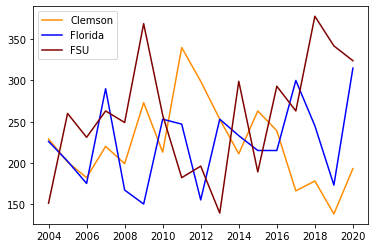

Clemson's r-value: -0.24
Florida's r-value: 0.33
FSU's r-value: 0.44


In [7]:
x_axis = teams_df["Season"]
plt.plot(x_axis,teams_df["Clemson Points Allowed"], color="darkorange")
plt.plot(x_axis,teams_df["Florida Points Allowed"], color="blue")
plt.plot(x_axis,teams_df["FSU Points Allowed"], color="maroon")
plt.legend(["Clemson","Florida","FSU"])
plt.show()
print(f"Clemson's r-value: {round(linear_regression(teams_df['Clemson Points Allowed']),2)}")
print(f"Florida's r-value: {round(linear_regression(teams_df['Florida Points Allowed']),2)}")
print(f"FSU's r-value: {round(linear_regression(teams_df['FSU Points Allowed']),2)}")

In [30]:
score_df.to_csv("Output/metrics_by_season.csv", index=False, header=True)
teams_df.to_csv("Output/teams_points_against.csv", index=False, header=True)